   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  output
0   63    1   3     145   233    1        0       150     0       1
1   37    1   2     130   250    0        1       187     0       1
2   41    0   1     130   204    0        0       172     0       1
3   56    1   1     120   236    0        1       178     0       1
4   57    0   0     120   354    0        1       163     1       1


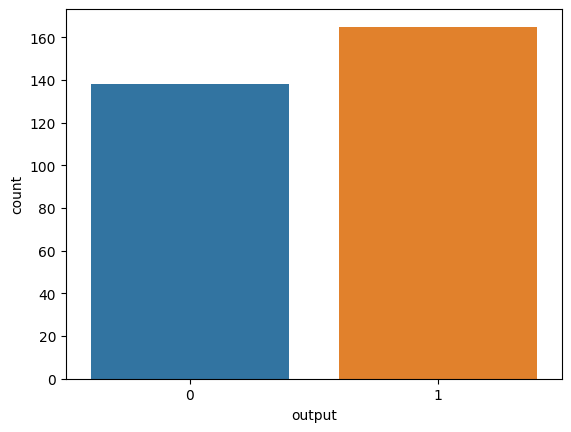

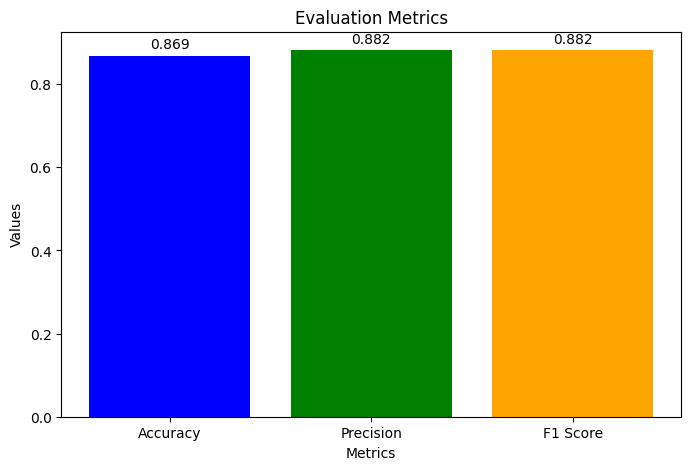


Orang tersebut tidak terkena serangan jantung


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Mengabaikan peringatan
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('heart.csv')

df = df.drop(columns=['slp', 'caa', 'thall', 'oldpeak'])
print(df.head())

# Visualize distribution of target variable
sns.countplot(x='output', data=df)
plt.show()

# Split data into features and target
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng']]
y = df['output']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on testing set
y_pred = nb.predict(X_test)

# Evaluate model performance using accuracy, precision, f1 score, mean squared error, and r2 score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualisasi evaluasi model
labels = ['Accuracy', 'Precision', 'F1 Score']
values = [acc, prec, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Menambahkan nilai di atas setiap bar
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.show()


new_data = [[60, 1, 2, 140, 293, 0, 1, 170, 1]]

# Make prediction on new data
y_pred_baru = nb.predict(new_data)

if y_pred_baru[0] == 1:
    print("\nOrang tersebut terkena serangan jantung")
else:
    print("\nOrang tersebut tidak terkena serangan jantung")
